In [1]:
import pandas as pd

df = pd.read_csv('Au_nanoparticle_dataset.csv')

print("Original DataFrame:")
print(df.head())

filtered_df = df.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])

print("\nFiltered DataFrame:")
print(filtered_df.head())

Original DataFrame:
   ID    T       tau  time  N_total  N_bulk  N_surface        Volume    R_min  \
0   1  273  0.000025     1     1599    1014        585  2.710000e-26  15.5898   
1   2  273  0.000025     2     1642    1034        608  2.780000e-26  15.3996   
2   3  273  0.000025     3     4637    3365       1272  7.850000e-26  21.9199   
3   4  273  0.000025     4     7189    5292       1897  1.220000e-25  23.2542   
4   5  273  0.000025     5    11004    8508       2496  1.860000e-25  27.1200   

     R_max  ...  q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  \
0  19.4516  ...         0         0         0         0         0         0   
1  24.1755  ...         0         0         0         0         0         0   
2  31.0305  ...         0         0         0         0         0         0   
3  37.8795  ...         0         0         0         0         0         0   
4  39.7614  ...         0         0         0         0         0         0   

   q6q6_S20  q6q6_

In [2]:
filtered_df = df.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])

print("\nFirst 20 samples of the Filtered DataFrame:")
print(filtered_df.head(20))


First 20 samples of the Filtered DataFrame:
    ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0    1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1    2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2    3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3    4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4    5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   
5    6  273  0.000025     6  2.260000e-25  33.2496  42.9612   9.7116  1.0219   
6    7  273  0.000025     7  2.340000e-25  33.6164  41.6168   8.0004  0.8979   
7    8  273  0.000025     8  2.360000e-25  34.5185  41.4386   6.9201  0.8595   
8    9  273  0.000025     9  2.370000e-25  34.7525  41.5998   6.8473  0.8483   
9   10  273  0.000025    10  2.380000e-25  34.7870  41.5401   6.7531  0.8308   
10  11  273  0.000050     1  2.600000e-26  15.0408  18.6580   3.6172  0.636

In [3]:
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
selected_df = df[selected_columns]

statistics = selected_df.describe()

quartiles = selected_df.quantile([0.25, 0.5, 0.75])

print("Mean and Standard Deviation:")
print(statistics.loc[['mean', 'std']])

print("\nQuartiles (25%, 50%, 75%):")
print(quartiles)
     

Mean and Standard Deviation:
          N_total       N_bulk  N_surface      R_avg
mean  3476.786500  2521.550250  955.23625  20.654363
std   3679.286769  2976.232459  721.87022   7.610716

Quartiles (25%, 50%, 75%):
      N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


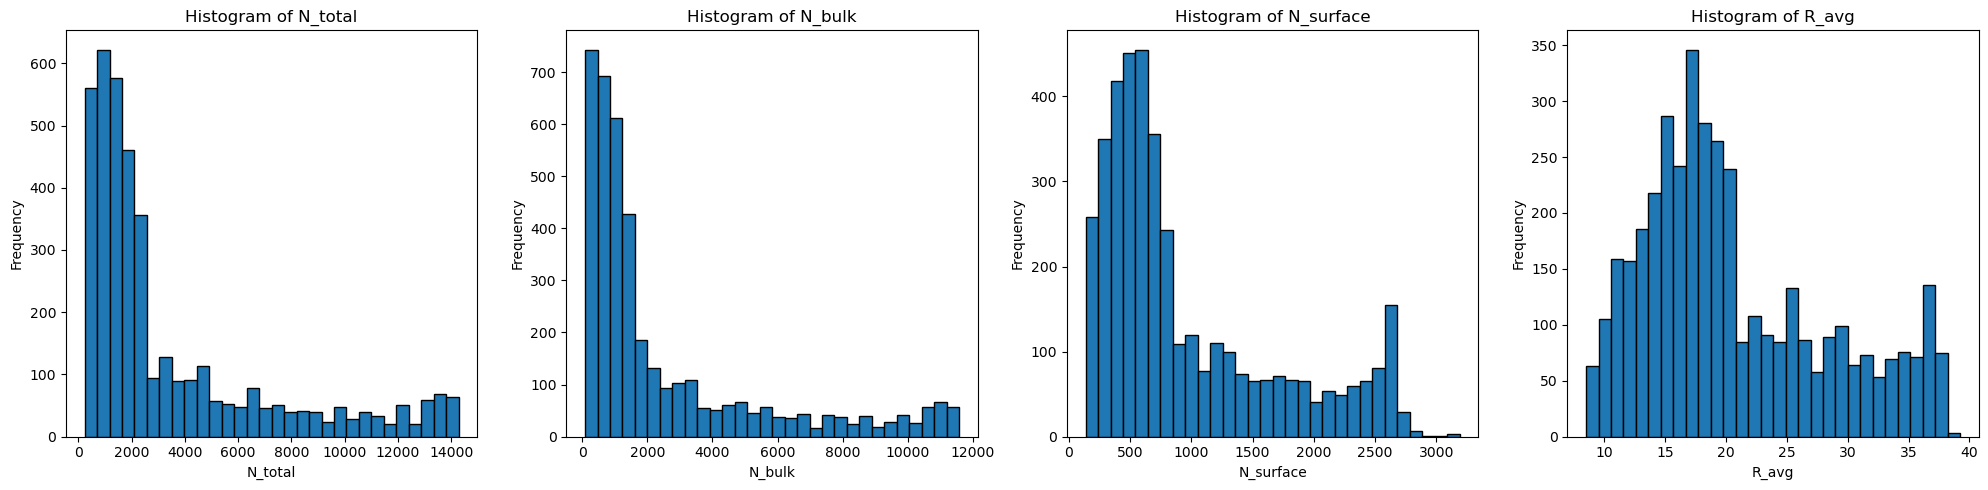

In [5]:
import matplotlib.pyplot as plt
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
selected_df = df[selected_columns]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, column in enumerate(selected_columns):
    axes[i].hist(selected_df[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

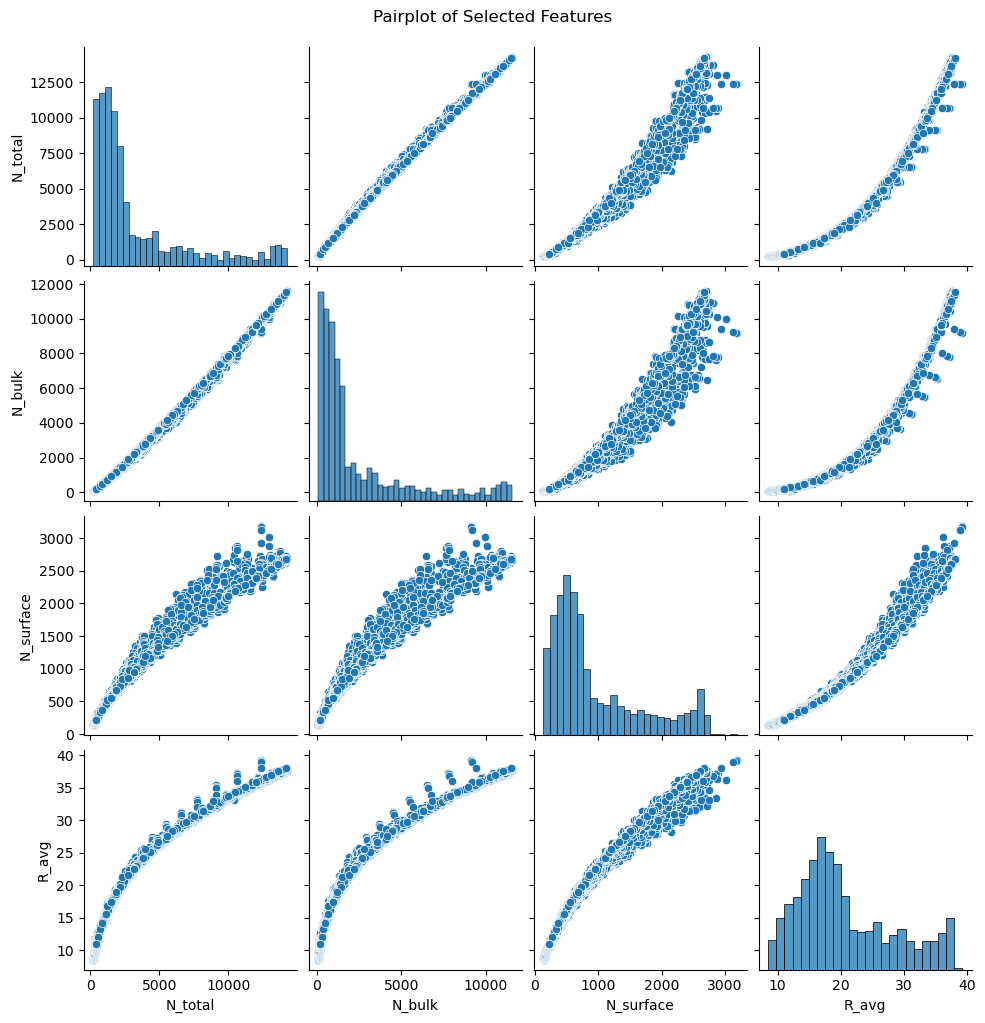

In [6]:
import seaborn as sns

selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
selected_df = df[selected_columns]


sns.pairplot(selected_df)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

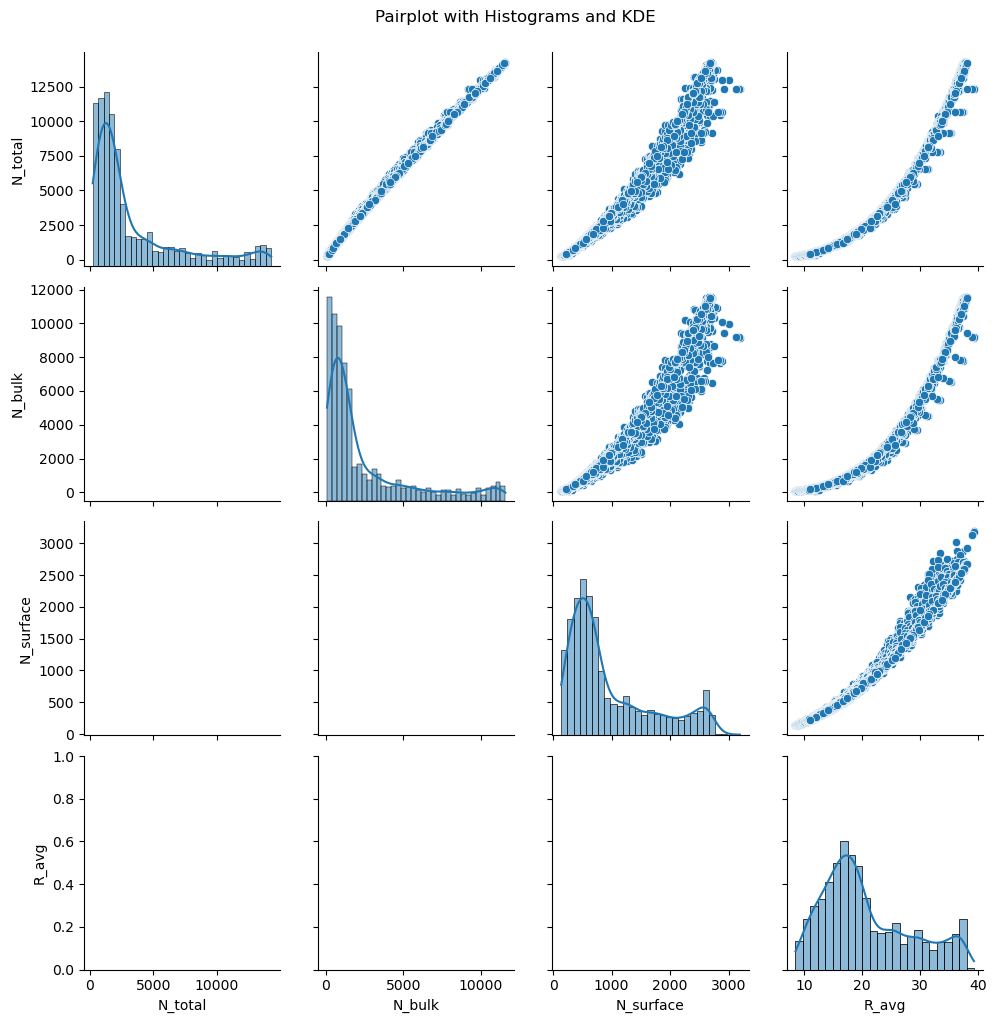

In [8]:
selected_columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
new_df = df[selected_columns]

g = sns.PairGrid(new_df)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

plt.suptitle('Pairplot with Histograms and KDE', y=1.02)
plt.show()